### Dataset
In this homework,we will use the Car price dataset.

We'll keep working with the MSRP variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data preparation
* Keep only the columns above 
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
data.shape

(11914, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [7]:
data = data[features]

In [8]:
data = data.rename(columns={'MSRP': 'price'})
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [10]:
data.nunique()

make                   48
model                 915
year                   28
engine_hp             356
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

In [11]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [12]:
data['engine_hp'] = data['engine_hp'].fillna(0)
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

In [13]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [14]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [15]:
data['price'].mean()

40594.737032063116

In [16]:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [17]:
data_class = data_class.drop(['price'], axis=1)

In [18]:
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [19]:
SEED = 1

In [20]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [21]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [24]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* `engine_hp`
* `engine_cylinders`
* `highway_mpg`
* `city_mpg`

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
data_numeric = data.copy()
data_numeric = data.drop(['make', 'model', 'transmission_type', 'vehicle_style', 'price'], axis=1)
data_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [27]:
highest_auc = 0
best_variable = None

for var in data_numeric:
    auc = roc_auc_score(y_train, df_train[var])
    print(var, auc)
    
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[var])
        print(var, auc)
    
    if auc > highest_auc:
        highest_auc = auc
        best_variable = var

print(f"Numerical variable with the highest AUC is: {best_variable}")

year 0.687551492804683
engine_hp 0.9171031265539011
engine_cylinders 0.766116490165669
highway_mpg 0.3669412128227987
highway_mpg 0.6330587871772013
city_mpg 0.3265755356754767
city_mpg 0.6734244643245233
Numerical variable with the highest AUC is: engine_hp


### Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
* `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.678
* 0.779
* 0.878
* 0.979

In [28]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [29]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [30]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [31]:
round(roc_auc_score(y_val,y_pred), 3)

0.976

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [32]:
def precision_recall_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.arange(0.0, 1.0, 0.01)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0

        scores.append((t, precision, recall))

    columns = ['threshold', 'precision', 'recall']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [33]:
df_scores = precision_recall_dataframe(y_val, y_pred)

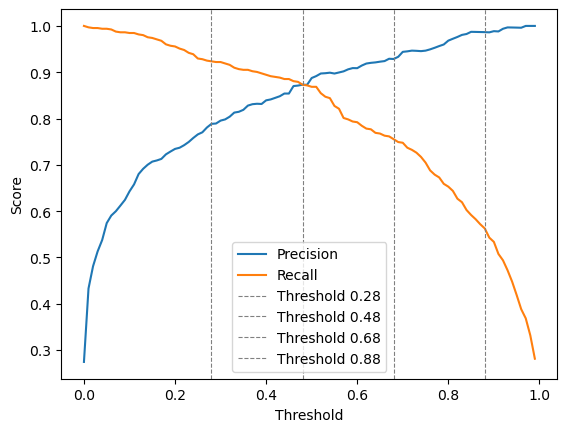

In [34]:
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')

thresholds_to_highlight = [0.28, 0.48, 0.68, 0.88]
for threshold in thresholds_to_highlight:
    plt.axvline(x=threshold, color='gray', linestyle='--', linewidth=0.8, label=f'Threshold {threshold}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$F_1 = 2 * \frac{P  R}{P + R}$ 

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?
* 0.12
* 0.32
* 0.52
* 0.72

In [35]:
def f1_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0

        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        scores.append((t, f1))

    columns = ['threshold', 'f1']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [36]:
df_f1_scores = f1_dataframe(y_val, y_pred)

max_f1_threshold = df_f1_scores.loc[df_f1_scores['f1'].idxmax(), 'threshold']

print("Threshold that maximizes the F1 score:", max_f1_threshold)

Threshold that maximizes the F1 score: 0.51


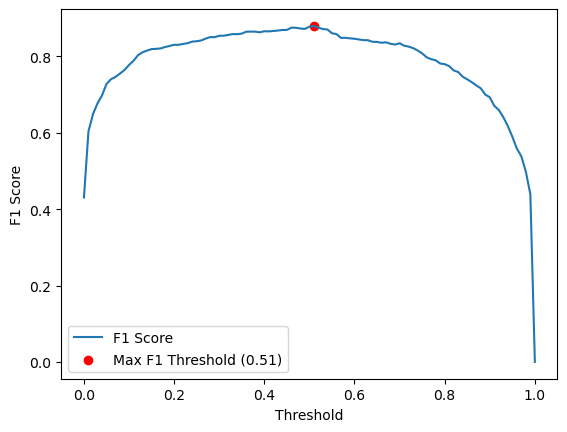

In [37]:
plt.plot(df_f1_scores['threshold'], df_f1_scores['f1'], label='F1 Score')
plt.scatter(max_f1_threshold, df_f1_scores['f1'].max(), color='red', label=f'Max F1 Threshold ({max_f1_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

### Question 5: 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:
* `KFold(n_splits=5, shuffle=True, random_state=1)`

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

* 0.003
* 0.030
* 0.090
* 0.140

In [38]:
from sklearn.model_selection import KFold

In [39]:
KFold = KFold(n_splits=5, shuffle=True, random_state=1)

In [40]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [41]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [42]:
scores = []

for train_idx, val_idx in KFold.split(df_full_train):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        del df_train['above_average']
        del df_val['above_average']

        dv, model  = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

*Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

* 0.01
* 0.1
* 0.5
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [43]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

In [44]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        
        del df_train['above_average']
        del df_val['above_average']

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|██▌       | 1/4 [00:01<00:03,  1.28s/it]

C=0.01 0.952 +- 0.003


 50%|█████     | 2/4 [00:02<00:02,  1.30s/it]

C=0.1 0.972 +- 0.002


 75%|███████▌  | 3/4 [00:04<00:01,  1.37s/it]

C=0.5 0.978 +- 0.001


100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

C=10 0.981 +- 0.003
